In [1]:
import os
import sys
sys.path.append('../')
from atlantic_hurricane import eccc_shapefiles

eccc_shapefiles.dl_all_shapefiles()

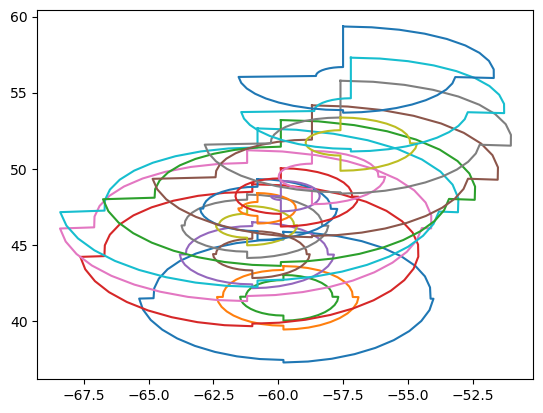

In [2]:
import os
import shapefile
import matplotlib.pyplot as plt
shape_dir = eccc_shapefiles.SHAPE_DIR
sf = shapefile.Reader(os.path.join(shape_dir, '20220924_0000Z_FIONA.rad.shp'))

plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

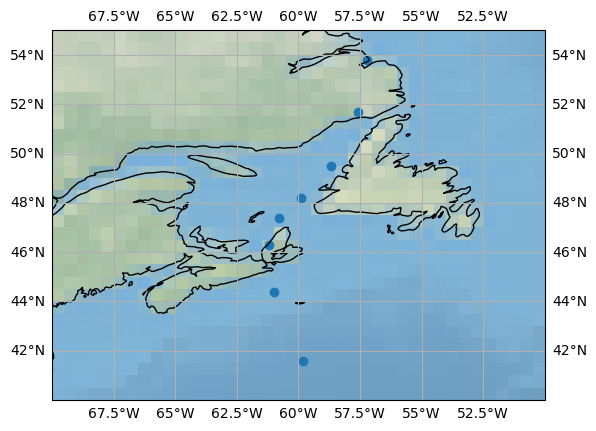

In [3]:
# From https://scitools.org.uk/cartopy/docs/latest/matplotlib/intro.html

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ax.set_extent([-70, -50, 40, 55], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.gridlines(draw_labels=True, x_inline=False, y_inline=False)

from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

fname = os.path.join(shape_dir, '20220924_0000Z_FIONA.pts.shp')
#shape_feature = ShapelyFeature(Reader(fname).geometries(),
#                                ccrs.PlateCarree(), facecolor='none')

points = list(Reader(fname).geometries())
ax.scatter([point.x for point in points],
           [point.y for point in points],
           transform=ccrs.Geodetic())
plt.show()


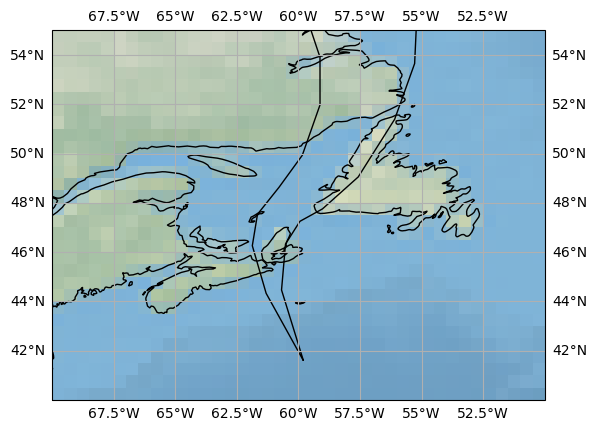

In [4]:
err_fname = os.path.join(shape_dir, '20220924_0000Z_FIONA.err.shp')

ax_err = plt.axes(projection=ccrs.PlateCarree())
ax_err.stock_img()

ax_err.set_extent([-70, -50, 40, 55], crs=ccrs.PlateCarree())
ax_err.coastlines(resolution='50m')
ax_err.gridlines(draw_labels=True, x_inline=False, y_inline=False)

err_shape_feature = ShapelyFeature(Reader(err_fname).geometries(),
                                ccrs.PlateCarree(), facecolor='none')

ax_err.add_feature(err_shape_feature)
plt.show()